In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
%matplotlib inline

In [2]:
train = pd.read_csv('Train_v2.csv')
test = pd.read_csv('Test_v2.csv')
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [4]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
train['bank_account'].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [7]:
#Let's see the ratio
no = len(train[train['bank_account'] == 'No'])
yes = len(train[train['bank_account'] == 'Yes'])
tra_len = len(train)
print('The ratio is %i/%i' %((no/tra_len*100),(yes/tra_len*100)+1))

The ratio is 85/15


In [8]:
#Therefore Stratification will tends to be beneficial

### Exploratory Data Analysis (EDA)

In [9]:
#Some uniqueIds are appearing multiple times which is as a result of different country
train['uniqueid'].value_counts().head()

uniqueid_1267    4
uniqueid_482     4
uniqueid_1020    4
uniqueid_506     4
uniqueid_1776    4
Name: uniqueid, dtype: int64

In [10]:
pd.crosstab(train['country'],train['bank_account'])

bank_account,No,Yes
country,,
Kenya,4547,1521
Rwanda,7732,1003
Tanzania,6013,607
Uganda,1920,181


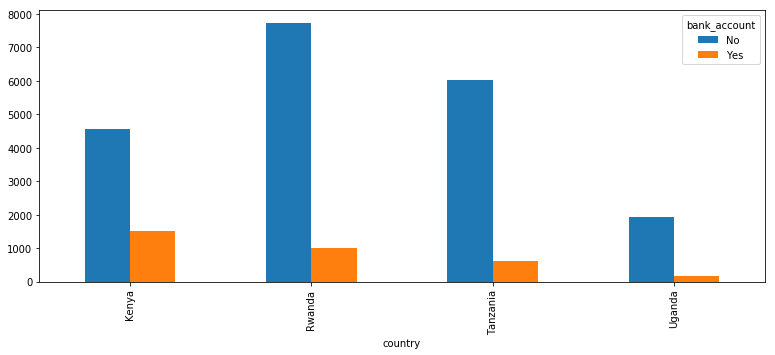

In [11]:
pd.crosstab(train['country'],train['bank_account']).plot(kind='bar',figsize=(13,5))

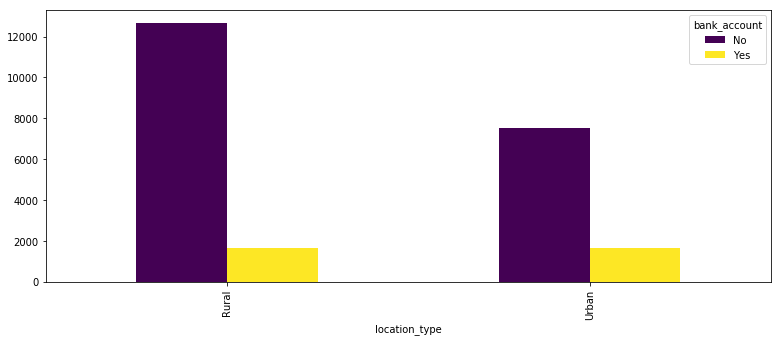

In [12]:
pd.crosstab(train['location_type'],train['bank_account']).plot(kind='bar',figsize=(13,5),colormap='viridis')

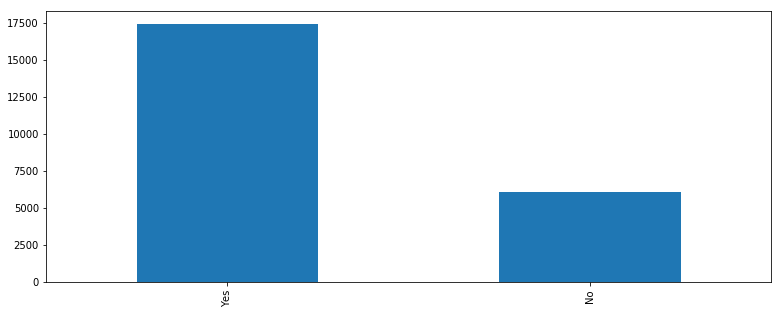

In [13]:
train['cellphone_access'].value_counts().plot(kind='bar',figsize=(13,5))

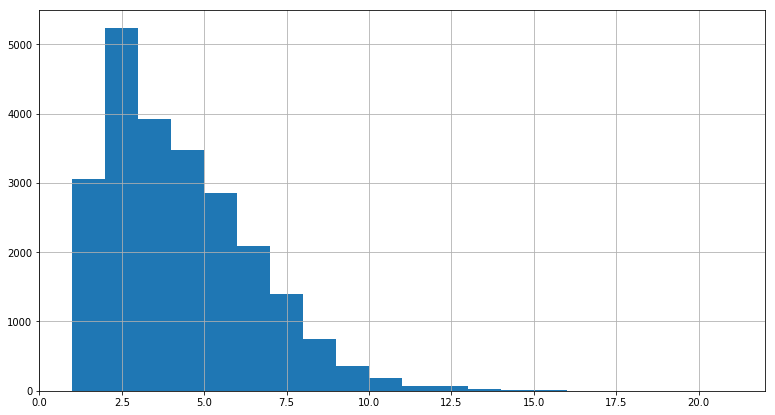

In [14]:
train['household_size'].hist(bins=20,figsize=(13,7))

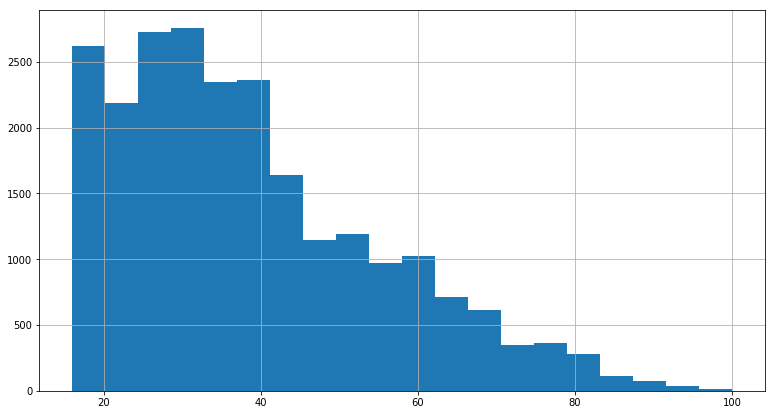

In [15]:
train['age_of_respondent'].hist(bins=20,figsize=(13,7))

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64

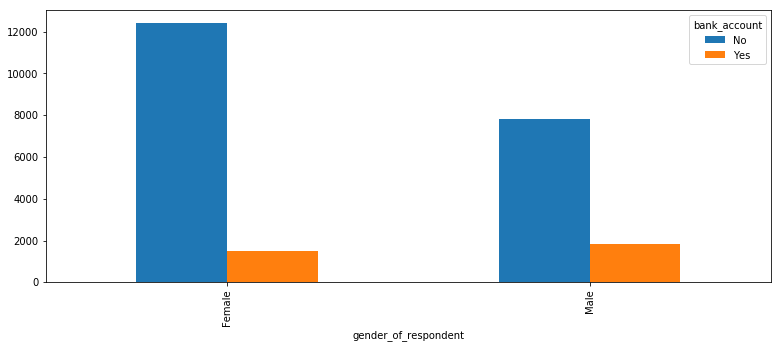

In [16]:
pd.crosstab(train['gender_of_respondent'],train['bank_account']).plot(kind='bar',figsize=(13,5))
train['gender_of_respondent'].value_counts()

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64

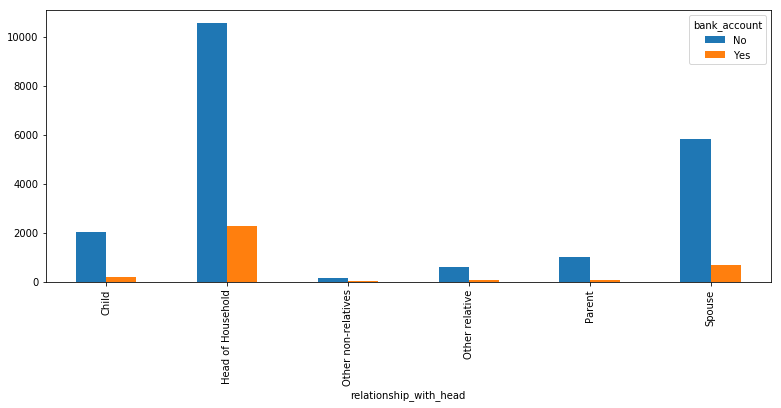

In [17]:
pd.crosstab(train['relationship_with_head'],train['bank_account']).plot(kind='bar',figsize=(13,5))
train['relationship_with_head'].value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

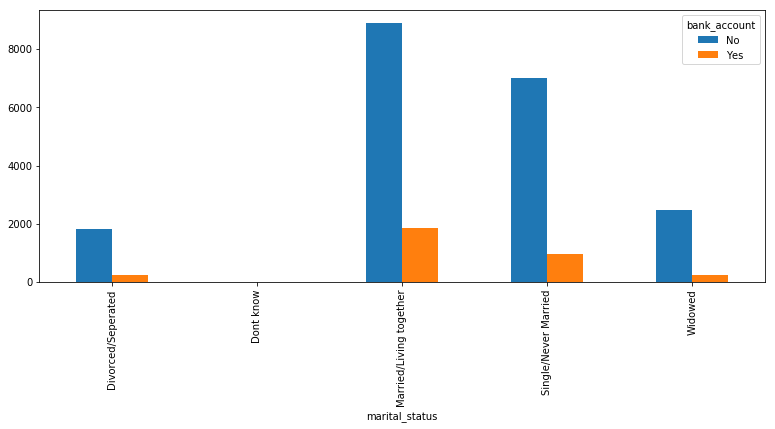

In [18]:
pd.crosstab(train['marital_status'],train['bank_account']).plot(kind='bar',figsize=(13,5))
train['marital_status'].value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

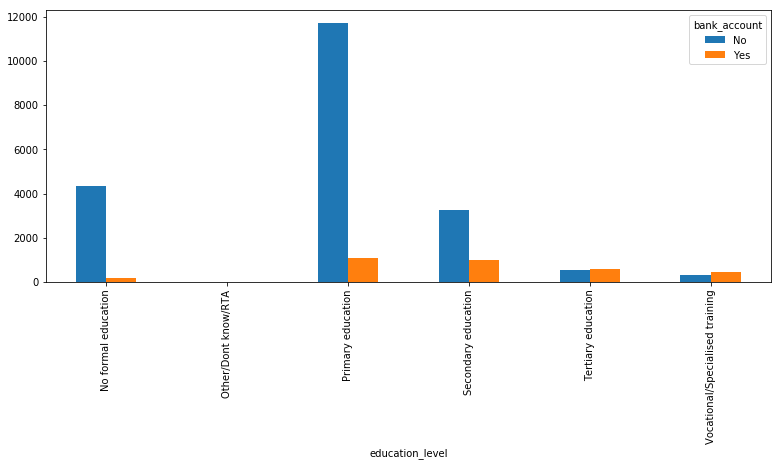

In [19]:
pd.crosstab(train['education_level'],train['bank_account']).plot(kind='bar',figsize=(13,5))
train['education_level'].value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

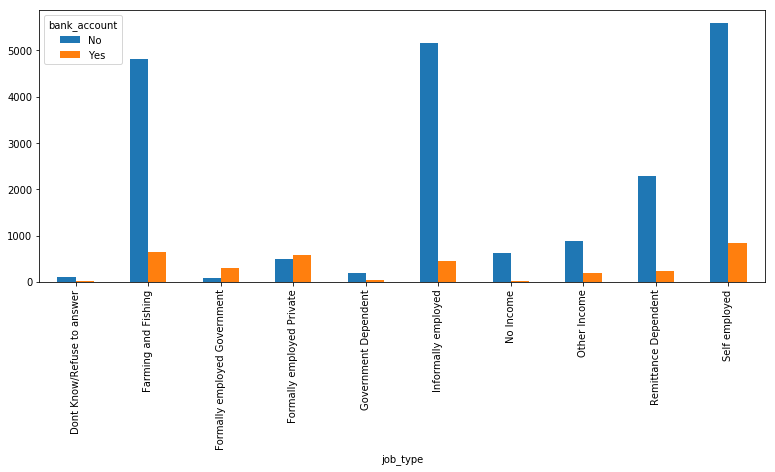

In [20]:
pd.crosstab(train['job_type'],train['bank_account']).plot(kind='bar',figsize=(13,5))
train['job_type'].value_counts()

In [21]:
# Checking the ratio of country variable for train set
uganda = len(train[train['country'] == 'Uganda'])
kenya = len(train[train['country'] == 'Kenya'])
rwanda = len(train[train['country'] == 'Rwanda'])
tanzania = len(train[train['country'] == 'Tanzania'])
tra_len = len(train)
print('Uganda %i%% Kenya %i%% Rwanda %i%% Tanzania %i%%'%(uganda/tra_len*100,
                                                           kenya/tra_len*100,
                                                          rwanda/tra_len*100,
                                                          tanzania/tra_len*100))

Uganda 8% Kenya 25% Rwanda 37% Tanzania 28%


In [22]:
# Checking the ratio of country variable for test set
uganda = len(test[test['country'] == 'Uganda'])
kenya = len(test[test['country'] == 'Kenya'])
rwanda = len(test[test['country'] == 'Rwanda'])
tanzania = len(test[test['country'] == 'Tanzania'])
tra_len = len(test)
print('Uganda %i%% Kenya %i%% Rwanda %i%% Tanzania %i%%'%(uganda/tra_len*100,
                                                           kenya/tra_len*100,
                                                          rwanda/tra_len*100,
                                                          tanzania/tra_len*100))

Uganda 8% Kenya 25% Rwanda 37% Tanzania 28%


In [23]:
train['year'].value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

In [24]:
test['year'].value_counts()

2016    3745
2018    3502
2017    2839
Name: year, dtype: int64

In [25]:
train[train['year'] == 2016]['country'].value_counts()

Rwanda    8735
Name: country, dtype: int64

In [26]:
train[train['year'] == 2017]['country'].value_counts()

Tanzania    6620
Name: country, dtype: int64

In [27]:
train[train['year'] == 2018]['country'].value_counts()

Kenya     6068
Uganda    2101
Name: country, dtype: int64

In [28]:
#Checking the Uniqueids in train
train[train['uniqueid'].duplicated(keep=False)].sort_values(by='uniqueid').head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
14803,Tanzania,2017,uniqueid_1,No,Rural,Yes,6,22,Female,Child,Divorced/Seperated,Secondary education,No Income
21423,Uganda,2018,uniqueid_1,No,Rural,No,5,32,Female,Head of Household,Divorced/Seperated,Primary education,Other Income
6068,Rwanda,2016,uniqueid_1,No,Urban,Yes,7,18,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
6077,Rwanda,2016,uniqueid_10,Yes,Urban,Yes,4,28,Male,Child,Single/Never Married,Tertiary education,Formally employed Government


In [29]:
#Checking the Uniqueids in test
test[test['uniqueid'].duplicated(keep=False)].sort_values(by='uniqueid').head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
421,Kenya,2018,uniqueid_6490,Urban,Yes,1,25,Female,Head of Household,Divorced/Seperated,Primary education,Informally employed
6346,Tanzania,2017,uniqueid_6490,Rural,Yes,3,33,Male,Head of Household,Single/Never Married,Secondary education,Self employed
6347,Tanzania,2017,uniqueid_6498,Urban,Yes,2,22,Female,Spouse,Single/Never Married,Secondary education,Self employed
429,Kenya,2018,uniqueid_6498,Rural,Yes,4,36,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
433,Kenya,2018,uniqueid_6502,Urban,Yes,4,33,Female,Spouse,Married/Living together,Primary education,Self employed


In [111]:
# train[(train['relationship_with_head'] == 'Spouse')]['bank_account'].value_counts()

In [112]:
# %%time
# di = {"Yes": 1, "No": 0}
# train.replace({"bank_account": di},inplace=True)

In [30]:
%%time
train['bank_account'] = train['bank_account'].map({"Yes": 1, "No": 0})

CPU times: user 7.43 ms, sys: 0 ns, total: 7.43 ms
Wall time: 18 ms


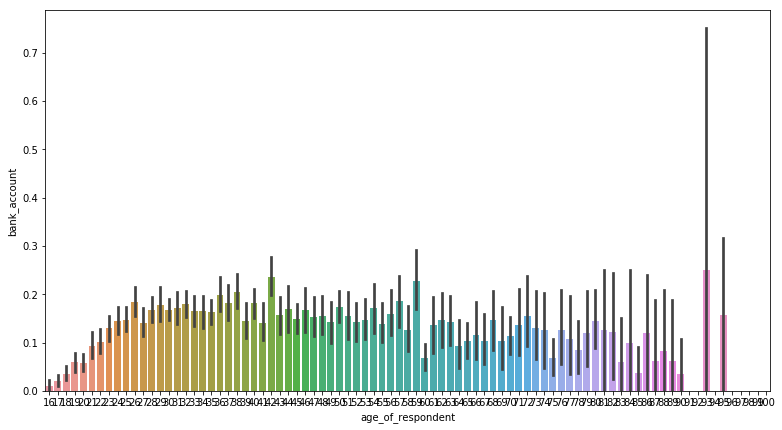

In [32]:
plt.figure(figsize=(13,7))
sns.barplot('age_of_respondent','bank_account',data=train)

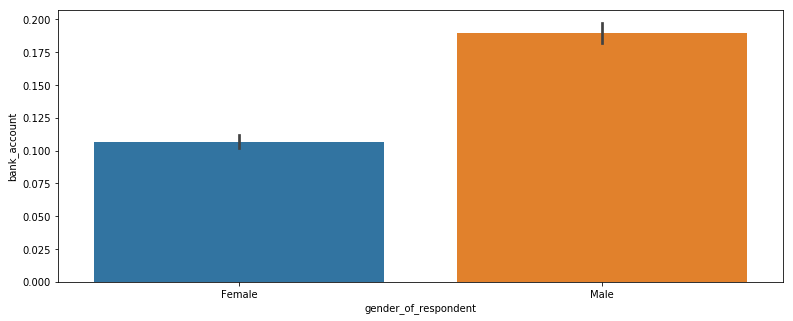

In [33]:
plt.figure(figsize=(13,5))
sns.barplot('gender_of_respondent','bank_account',data=train)

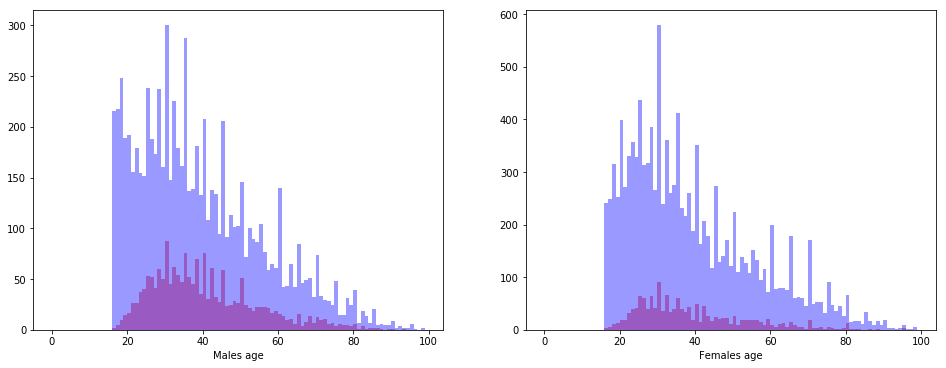

In [34]:
import warnings

#Gender + Age

warnings.filterwarnings(action="ignore")
plt.figure(figsize=[25,20])
plt.subplot(331)
sns.distplot(train[(train.gender_of_respondent=='Male')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.gender_of_respondent=='Male')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Males age')
plt.subplot(332)
sns.distplot(train[(train.gender_of_respondent=='Female')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.gender_of_respondent=='Female')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Females age')

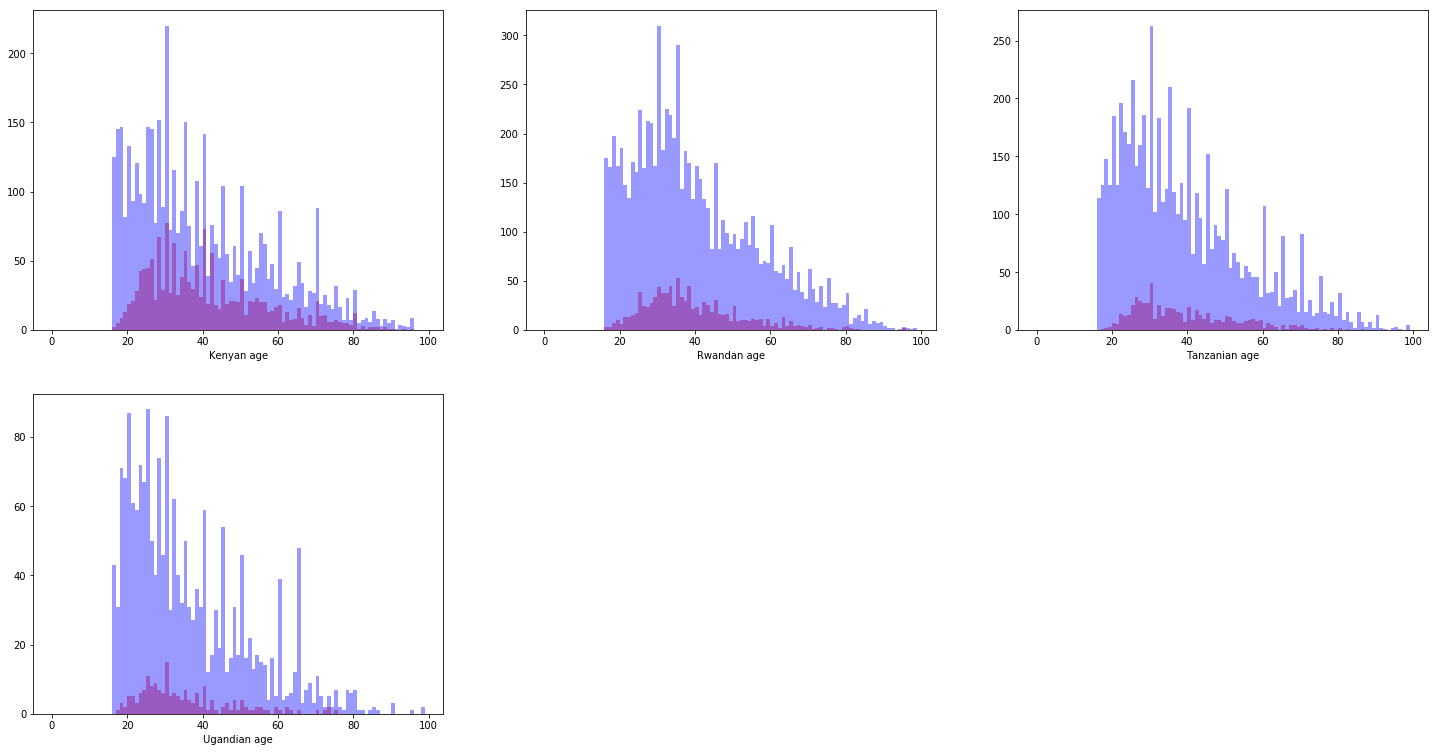

In [123]:
# Age+Country


warnings.filterwarnings(action="ignore")
plt.figure(figsize=[25,20])
plt.subplot(331)
sns.distplot(train[(train.country=='Kenya')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.country=='Kenya')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Kenyan age')
plt.subplot(332)
sns.distplot(train[(train.country=='Rwanda')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.country=='Rwanda')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Rwandan age')
plt.subplot(333)
sns.distplot(train[(train.country=='Tanzania')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.country=='Tanzania')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Tanzanian age')
plt.subplot(334)
sns.distplot(train[(train.country=='Uganda')&(train.bank_account==1)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='red')
sns.distplot(train[(train.country=='Uganda')&(train.bank_account==0)]['age_of_respondent'].dropna().values, bins=range(0, 100, 1), kde=False, color='blue',
            axlabel='Ugandian age')

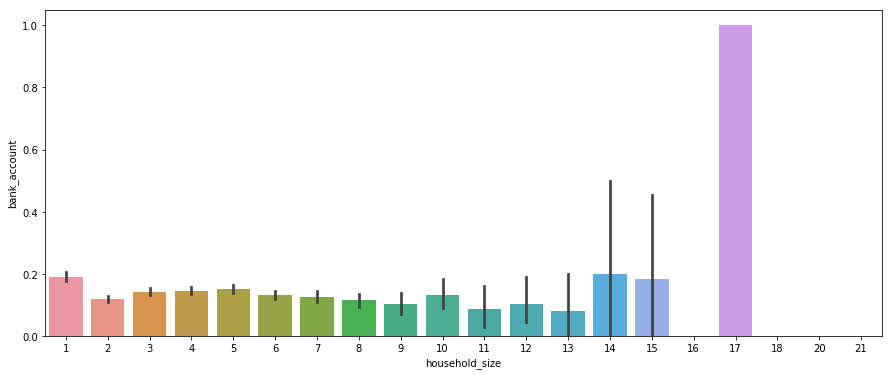

In [35]:
plt.figure(figsize=[15,6])
sns.barplot('household_size', 'bank_account', data=train)

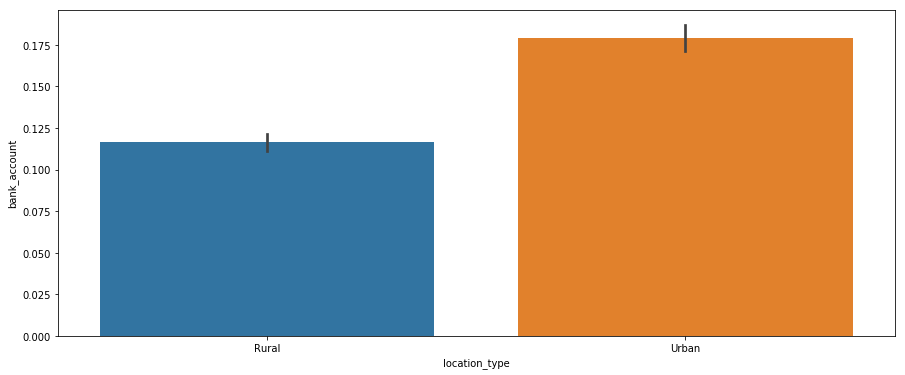

In [36]:
plt.figure(figsize=[15,6])
sns.barplot('location_type', 'bank_account', data=train)

In [37]:
# Feature Interactions

In [38]:
# Creating a binned categorial value for household_size
bins = [0,1,10,25]
labels = [1,2,3]
train['familysize'] = pd.cut(train['household_size'],bins=bins,labels=labels)
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,familysize
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,2
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,2
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,2
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,2
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,2


In [39]:
# train['familysize'].astype(np.int64)
train['familysize'].value_counts()

2    20276
1     3057
3      191
Name: familysize, dtype: int64

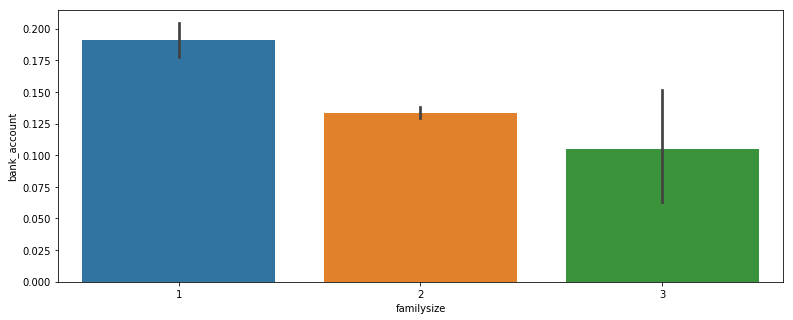

In [40]:
#We can then conclude from the binned value that the bigger the a house a person lives,
#the less likely that the person would have a bank account.
plt.figure(figsize=(13,5))
sns.barplot('familysize','bank_account',data = train)

In [41]:
# Binning the age
bins = [10,20,30,40,60,80,100]
labels = [1,2,3,4,5,6]
train['binnedage'] = pd.cut(train['age_of_respondent'],bins=bins,labels=labels)

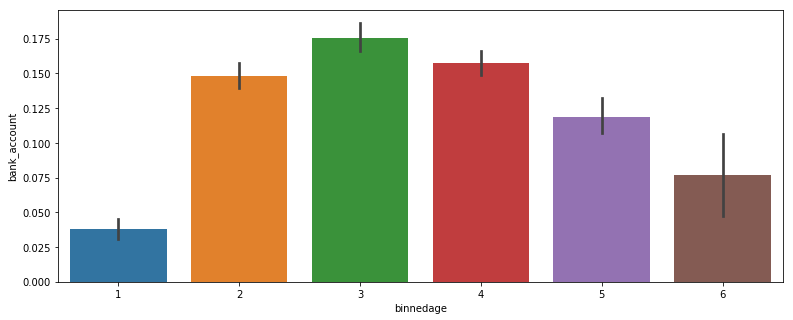

In [42]:
plt.figure(figsize=(13,5))
sns.barplot('binnedage','bank_account',data = train)

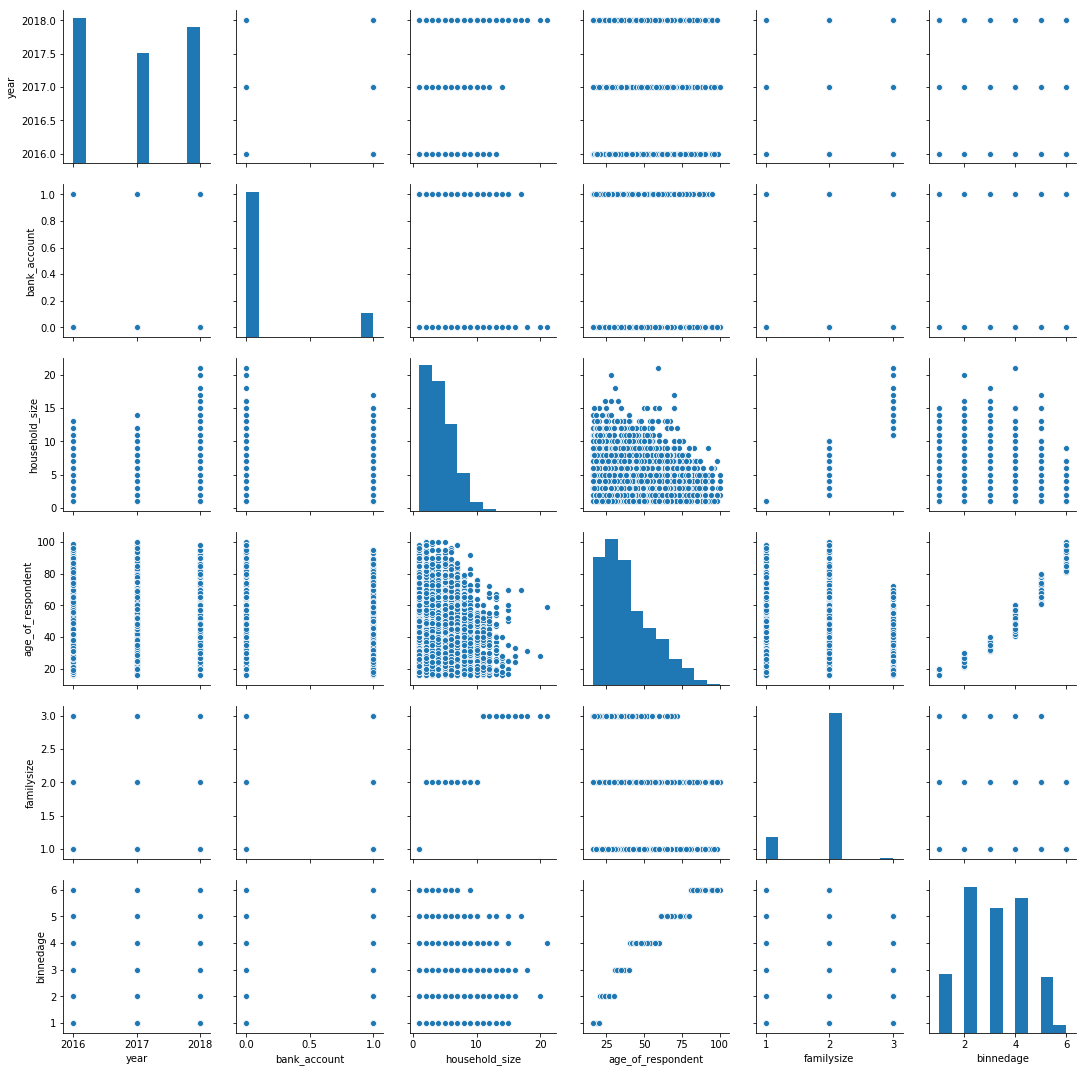

In [64]:
sns.pairplot(train)